### Import Packages

In [2]:
!pip install datasist

In [3]:
import os
import datasist as ds
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing as skp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns 
from scipy import stats
from scipy.stats import norm
print(os.listdir('../input/engraulis-encrasicolus-prediction/'))

['sample_submission.csv', 'train.csv', 'test.csv']


### Read Data

In [4]:
train = pd.read_csv('../input/engraulis-encrasicolus-prediction/train.csv')
print("Train has {} samples and {} variables.".format(train.shape[0],train.shape[1]))

Train has 527 samples and 6831 variables.


**Usefull information about the data**. Datasist module provides describe function that returns usefull information about data.

In [5]:
 ds.structdata.describe(train)

First five data points


,obs_id,Center Lat,Center Long,Overall Probability,distanceToCoast,majorRiverDistance,majorRiversScale,bathymetry,substrateType,temperatureSurface_mean,...,nitrate100_300_neighbor_min,nitrate100_300_neighbor_std,phosphateSurface_neighbor_mean,phosphateSurface_neighbor_max,phosphateSurface_neighbor_min,phosphateSurface_neighbor_std,phosphate100_300_neighbor_mean,phosphate100_300_neighbor_max,phosphate100_300_neighbor_min,phosphate100_300_neighbor_std
0,0,37.25,15.25,0.78,0.202705,405.785399,9,-20.975300,Muddy sand,20.342262,...,0.105786,0.863075,0.015962,0.021693,0.013084,0.003389,0.083518,0.139495,0.022677,0.048012
1,1,38.25,1.25,0.28,45.173330,358.080457,5,-1380.840000,Sand,19.975585,...,3.911926,0.415026,0.012160,0.013913,0.011261,0.001031,0.258413,0.263190,0.245935,0.007244
2,2,36.75,5.25,1.00,11.082162,707.703993,9,-772.565979,Sandy mud,20.033488,...,4.285709,0.000000,0.018645,0.018645,0.018645,0.000000,0.247956,0.247956,0.247956,0.000000
3,3,36.25,11.25,1.00,45.638871,616.947859,9,-68.390900,Fine mud,20.512575,...,0.081863,0.274042,0.013061,0.018203,0.009727,0.002953,0.021216,0.080217,0.009735,0.022483
4,4,35.25,32.25,0.06,15.474774,379.020110,6,-1582.170000,Unknown,22.447230,...,1.021640,0.000000,0.009224,0.009224,0.009224,0.000000,0.069003,0.069003,0.069003,0.000000




Random five data points


,obs_id,Center Lat,Center Long,Overall Probability,distanceToCoast,majorRiverDistance,majorRiversScale,bathymetry,substrateType,temperatureSurface_mean,...,nitrate100_300_neighbor_min,nitrate100_300_neighbor_std,phosphateSurface_neighbor_mean,phosphateSurface_neighbor_max,phosphateSurface_neighbor_min,phosphateSurface_neighbor_std,phosphate100_300_neighbor_mean,phosphate100_300_neighbor_max,phosphate100_300_neighbor_min,phosphate100_300_neighbor_std
389,389,33.25,14.25,0.40,60.166197,853.981272,9,-432.970001,Sandy mud,22.034561,...,0.017373,1.546384,0.008242,0.008453,0.007821,0.000298,0.054159,0.145663,0.008406,0.064704
427,427,39.25,20.75,0.56,19.113278,124.700959,8,-23.061100,Posidonia oceanica meadows,19.884582,...,0.101401,0.167802,0.012865,0.013892,0.010384,0.001293,0.036132,0.052272,0.010366,0.015531
514,514,38.75,24.75,0.73,6.196039,379.988157,9,-492.052002,Sandy mud,19.299865,...,0.365816,0.179173,0.018545,0.024443,0.012611,0.004534,0.069308,0.098368,0.061274,0.011820
123,123,36.25,13.25,0.03,53.846821,541.995467,9,-537.984985,Coarse and mixed sediment,20.502426,...,0.026070,1.475360,0.011598,0.013011,0.009067,0.001150,0.098131,0.157938,0.012256,0.065192
515,515,38.75,0.25,0.85,1.433986,258.938439,5,-56.603500,Rock or other hard substrata,19.563952,...,1.805380,1.314652,0.013745,0.015519,0.011772,0.001630,0.202655,0.259031,0.153206,0.046487




Last five data points


,obs_id,Center Lat,Center Long,Overall Probability,distanceToCoast,majorRiverDistance,majorRiversScale,bathymetry,substrateType,temperatureSurface_mean,...,nitrate100_300_neighbor_min,nitrate100_300_neighbor_std,phosphateSurface_neighbor_mean,phosphateSurface_neighbor_max,phosphateSurface_neighbor_min,phosphateSurface_neighbor_std,phosphate100_300_neighbor_mean,phosphate100_300_neighbor_max,phosphate100_300_neighbor_min,phosphate100_300_neighbor_std
522,522,39.25,8.25,0.90,7.703514,593.391422,7,-114.044998,Muddy sand,18.531949,...,2.897031,0.000000,0.028790,0.028790,0.028790,0.000000,0.210504,0.210504,0.210504,0.000000
523,523,39.75,19.75,0.33,5.018928,114.356625,8,-11.366700,Muddy sand,19.350193,...,0.786475,0.000000,0.015403,0.015403,0.015403,0.000000,0.072417,0.072417,0.072417,0.000000
524,524,39.25,7.75,0.39,40.949822,615.273729,9,-718.906006,Fine mud,19.459831,...,4.817620,0.000000,0.020931,0.020931,0.020931,0.000000,0.244181,0.244181,0.244181,0.000000
525,525,31.75,32.25,0.11,38.935804,147.859840,6,-32.206799,Fine mud,22.958270,...,0.021029,0.033668,0.031718,0.044322,0.006509,0.017825,0.032893,0.044311,0.010057,0.016148
526,526,40.75,18.25,0.62,22.585603,178.770546,9,-132.179001,Sandy mud,19.107911,...,0.079735,0.813282,0.020205,0.028381,0.014934,0.005004,0.077428,0.135037,0.018516,0.049139




Shape of  data set: (527, 6831)


Size of  data set: 3599937


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
obs_id,int64
Center Lat,float64
Center Long,float64
Overall Probability,float64
distanceToCoast,float64
...,...
phosphateSurface_neighbor_std,float64
phosphate100_300_neighbor_mean,float64
phosphate100_300_neighbor_max,float64
phosphate100_300_neighbor_min,float64




Numerical Features in Data set
['obs_id', 'Center Lat', 'Center Long', 'Overall Probability', 'distanceToCoast', 'majorRiverDistance', 'majorRiversScale', 'bathymetry', 'temperatureSurface_mean', 'temperatureSurface_median', 'temperatureSurface_std', 'temperatureSurface_max', 'temperatureSurface_min', 'temperatureSurface_max_to_min_diff', 'temperatureSurface_skew', 'temperatureSurface_kurt', 'temperatureSurface_mad', 'temperatureSurface_quantile_1', 'temperatureSurface_quantile_5', 'temperatureSurface_quantile_10', 'temperatureSurface_quantile_90', 'temperatureSurface_quantile_95', 'temperatureSurface_quantile_99', 'temperature100_300_mean', 'temperature100_300_median', 'temperature100_300_std', 'temperature100_300_max', 'temperature100_300_min', 'temperature100_300_max_to_min_diff', 'temperature100_300_skew', 'temperature100_300_kurt', 'temperature100_300_mad', 'temperature100_300_quantile_1', 'temperature100_300_quantile_5', 'temperature100_300_quantile_10', 'temperature100_300_qua

['substrateType']



Statistical Description of Columns


,obs_id,Center Lat,Center Long,Overall Probability,distanceToCoast,majorRiverDistance,majorRiversScale,bathymetry,temperatureSurface_mean,temperatureSurface_median,...,nitrate100_300_neighbor_min,nitrate100_300_neighbor_std,phosphateSurface_neighbor_mean,phosphateSurface_neighbor_max,phosphateSurface_neighbor_min,phosphateSurface_neighbor_std,phosphate100_300_neighbor_mean,phosphate100_300_neighbor_max,phosphate100_300_neighbor_min,phosphate100_300_neighbor_std
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,263.000000,37.894213,15.878083,0.598121,26.362789,376.272856,8.018975,-431.831838,20.039697,19.394229,...,0.905835,0.663245,0.018177,0.023402,0.014814,0.003345,0.101756,0.141535,0.060927,0.033312
std,152.276065,3.649715,9.687867,0.336374,29.588043,260.412696,1.192347,600.695809,1.583068,1.646981,...,1.361195,0.708254,0.015511,0.035195,0.011433,0.013280,0.075672,0.092745,0.074022,0.035626
min,0.000000,30.250000,-5.250000,0.010000,0.046582,20.069816,3.000000,-3549.760000,15.052781,15.052781,...,0.003647,0.000000,0.004522,0.004522,0.004200,0.000000,0.004516,0.004516,0.004161,0.000000
25%,131.500000,35.250000,10.250000,0.260000,7.721693,180.456440,7.000000,-617.119995,19.024226,18.282834,...,0.092707,0.035803,0.011041,0.012438,0.009080,0.000210,0.050195,0.084654,0.013525,0.000706
50%,263.000000,37.750000,15.250000,0.670000,17.957819,285.139515,8.000000,-132.179001,19.789864,19.015167,...,0.250416,0.424037,0.015802,0.018561,0.012748,0.001354,0.086822,0.133221,0.026342,0.026375
75%,394.500000,40.750000,23.250000,0.900000,33.463495,520.726171,9.000000,-31.008400,21.066400,20.440677,...,1.075607,1.105041,0.020176,0.024443,0.016949,0.003126,0.135076,0.212842,0.086756,0.053145
max,526.000000,45.750000,36.250000,1.000000,252.459628,1140.799940,9.000000,0.000000,23.569543,23.409298,...,8.027457,4.059680,0.231125,0.720065,0.130047,0.284924,0.563490,0.564494,0.563490,0.264780




Description of Categorical Features


,count,unique,top,freq
substrateType,527,9,Sandy mud,137




Unique class Count of Categorical features


,Feature,Unique Count
0,substrateType,9




Missing Values in Data


,features,missing_counts,missing_percent
0,obs_id,0,0.0
1,Center Lat,0,0.0
2,Center Long,0,0.0
3,Overall Probability,0,0.0
4,distanceToCoast,0,0.0
...,...,...,...
6826,phosphateSurface_neighbor_std,0,0.0
6827,phosphate100_300_neighbor_mean,0,0.0
6828,phosphate100_300_neighbor_max,0,0.0
6829,phosphate100_300_neighbor_min,0,0.0


**ENCODING CATEGORICAL FEATURES**

Substrate is the onfy feature with categorical values. We use LabelEncoder() in order to encode it.

In [6]:
for df in [train]:
    for c in df:
        if (df[c].dtype=='object'):
            lbl = skp.LabelEncoder() 
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(list(df[c].values))
train.head()

,obs_id,Center Lat,Center Long,Overall Probability,distanceToCoast,majorRiverDistance,majorRiversScale,bathymetry,substrateType,temperatureSurface_mean,...,nitrate100_300_neighbor_min,nitrate100_300_neighbor_std,phosphateSurface_neighbor_mean,phosphateSurface_neighbor_max,phosphateSurface_neighbor_min,phosphateSurface_neighbor_std,phosphate100_300_neighbor_mean,phosphate100_300_neighbor_max,phosphate100_300_neighbor_min,phosphate100_300_neighbor_std
0,0,37.25,15.25,0.78,0.202705,405.785399,9,-20.975300,3,20.342262,...,0.105786,0.863075,0.015962,0.021693,0.013084,0.003389,0.083518,0.139495,0.022677,0.048012
1,1,38.25,1.25,0.28,45.173330,358.080457,5,-1380.840000,6,19.975585,...,3.911926,0.415026,0.012160,0.013913,0.011261,0.001031,0.258413,0.263190,0.245935,0.007244
2,2,36.75,5.25,1.00,11.082162,707.703993,9,-772.565979,7,20.033488,...,4.285709,0.000000,0.018645,0.018645,0.018645,0.000000,0.247956,0.247956,0.247956,0.000000
3,3,36.25,11.25,1.00,45.638871,616.947859,9,-68.390900,2,20.512575,...,0.081863,0.274042,0.013061,0.018203,0.009727,0.002953,0.021216,0.080217,0.009735,0.022483
4,4,35.25,32.25,0.06,15.474774,379.020110,6,-1582.170000,8,22.447230,...,1.021640,0.000000,0.009224,0.009224,0.009224,0.000000,0.069003,0.069003,0.069003,0.000000


<font size ="+1">Our purpose in this exercise is to predict the probability of Occurence for the Marine Species Engraulis Encrasicolus. Before doing that data analysis and visualizations are a crucial step in order to draw helpful conclusions from data. Let 's start with overall probability. As we can see it looks like a bimodal distribution(2 peaks). We can clearly see that there is a large number of occurances that have probability of occurance nearly one</font>

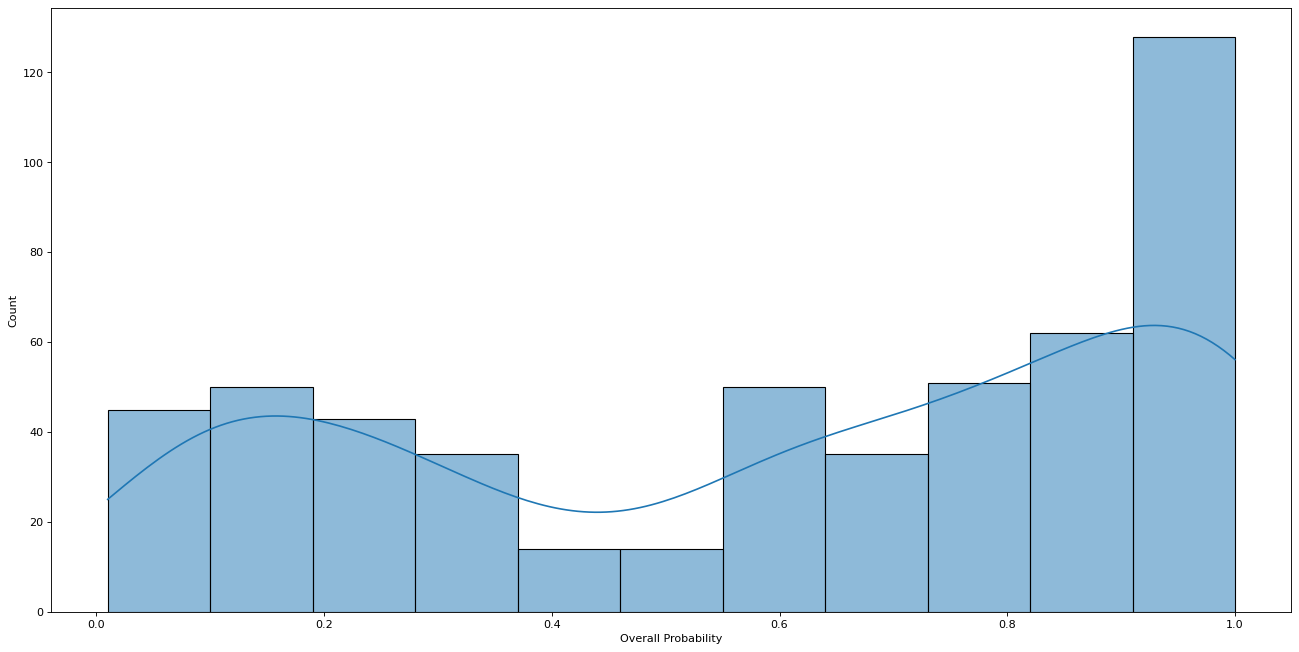

In [7]:
over_prop = train['Overall Probability']
plt.figure(figsize=(20,10), dpi= 80)
kwargs = dict(kde_kws={'linewidth':2})
plot1 = sns.histplot(data = over_prop,kde=True)

In [8]:
basic_attr = train[['Overall Probability','Center Lat','Center Long','temperatureSurface_mean','salinitySurface_mean','secchiDiskDepth_mean','dissolvedOxygenSurface_mean','chlorophyll_mean','euphoticDepth_mean','wave_Height_mean','meridionalCurrentSurface_mean','zonalCurrentSurface_mean','bathymetry','majorRiverDistance','majorRiversScale','substrateType']]

<font size ="+1"> Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations. If we want to compute and visualize correlation between features and target("Overall Probability") pandas has 3 available methods to compute pairwise correlation: </font>
1. Pearson
2. Kendall
3. Spearman

<font size ="+1">As we see each one of them produces a different result and even a different rank between the basic features defined above and the Overall Probability. </font>

In [9]:
corr_mat = basic_attr.corr()

Overall Probability              1.000000
Center Lat                       0.395619
euphoticDepth_mean               0.366609
zonalCurrentSurface_mean         0.206971
majorRiversScale                 0.168600
bathymetry                       0.165937
dissolvedOxygenSurface_mean      0.077311
chlorophyll_mean                 0.025894
substrateType                    0.018503
meridionalCurrentSurface_mean   -0.000494
wave_Height_mean                -0.006991
majorRiverDistance              -0.123469
secchiDiskDepth_mean            -0.345659
temperatureSurface_mean         -0.566542
Center Long                     -0.601996
salinitySurface_mean            -0.663965
Name: Overall Probability, dtype: float64


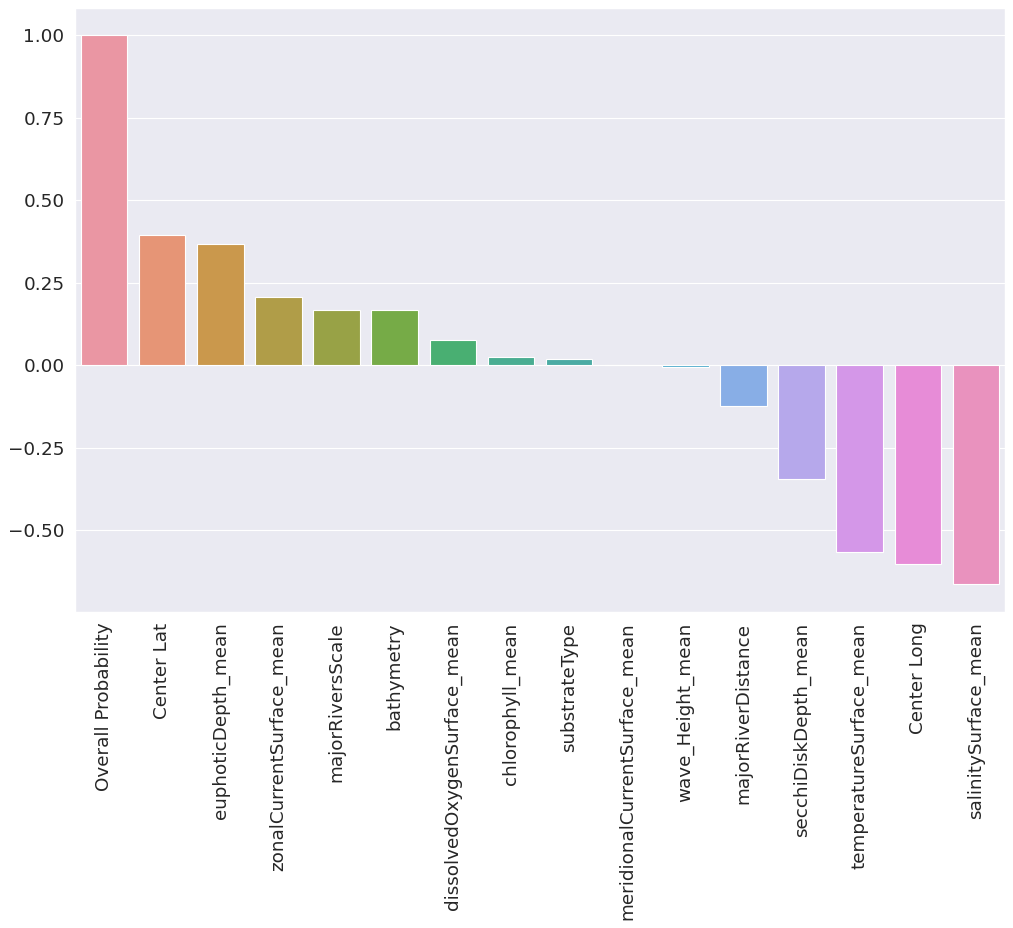

In [17]:
#Correlation with output variable
cor_target = corr_mat['Overall Probability'].sort_values(kind="quicksort", ascending=False)
print(cor_target)
#Selecting highly correlated features
plt.figure(figsize=(15,10), dpi= 80)
plot2 = sns.barplot(x=cor_target.index,y=cor_target.values)
plot2.set_xticklabels(cor_target.index.T,rotation=90)
sns.set(font_scale=1.5)

In [13]:
corr_mat1 = basic_attr.corr("kendall")

Overall Probability              1.000000
euphoticDepth_mean               0.373373
chlorophyll_mean                 0.350950
Center Lat                       0.213823
dissolvedOxygenSurface_mean      0.177456
majorRiversScale                 0.095886
bathymetry                       0.093033
zonalCurrentSurface_mean         0.081678
meridionalCurrentSurface_mean    0.029413
substrateType                    0.001413
wave_Height_mean                -0.023192
majorRiverDistance              -0.041375
secchiDiskDepth_mean            -0.305260
temperatureSurface_mean         -0.353343
Center Long                     -0.462808
salinitySurface_mean            -0.566263
Name: Overall Probability, dtype: float64


[Text(0, 0, 'Overall Probability'),
 Text(1, 0, 'euphoticDepth_mean'),
 Text(2, 0, 'chlorophyll_mean'),
 Text(3, 0, 'Center Lat'),
 Text(4, 0, 'dissolvedOxygenSurface_mean'),
 Text(5, 0, 'majorRiversScale'),
 Text(6, 0, 'bathymetry'),
 Text(7, 0, 'zonalCurrentSurface_mean'),
 Text(8, 0, 'meridionalCurrentSurface_mean'),
 Text(9, 0, 'substrateType'),
 Text(10, 0, 'wave_Height_mean'),
 Text(11, 0, 'majorRiverDistance'),
 Text(12, 0, 'secchiDiskDepth_mean'),
 Text(13, 0, 'temperatureSurface_mean'),
 Text(14, 0, 'Center Long'),
 Text(15, 0, 'salinitySurface_mean')]

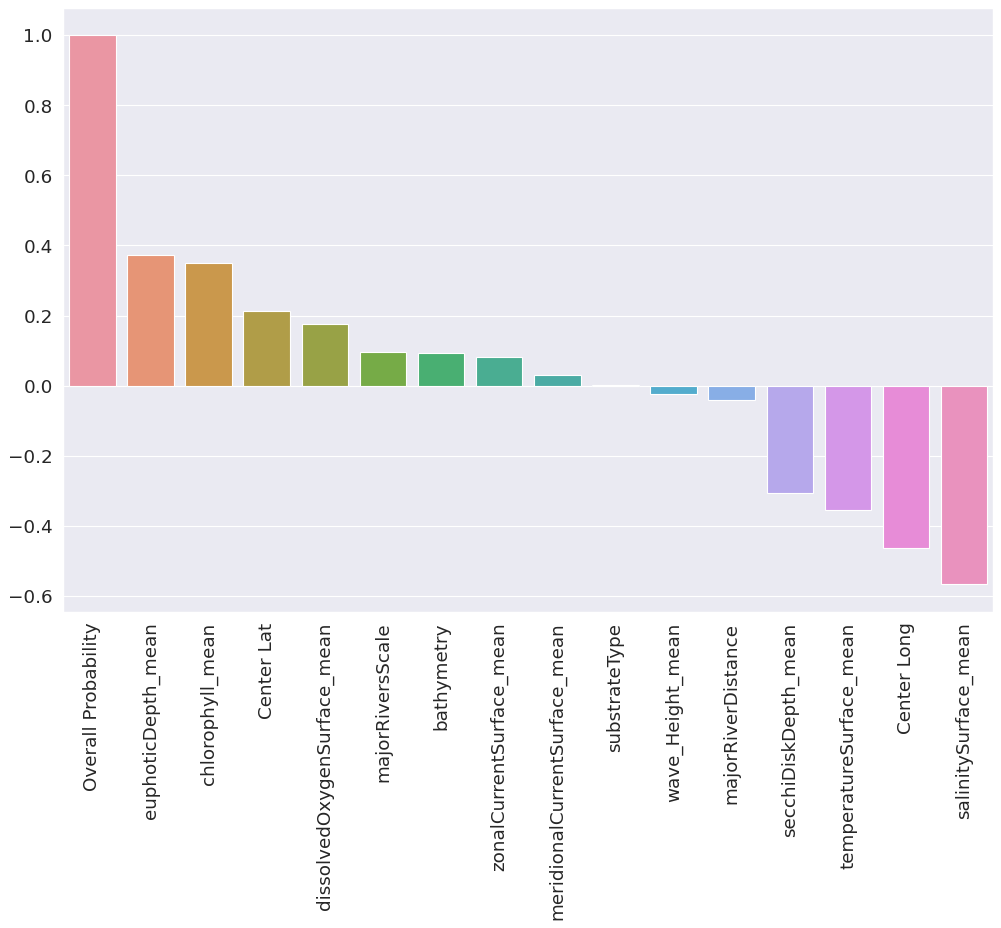

In [20]:
#Correlation with output variable
cor_target1 = corr_mat1['Overall Probability'].sort_values(kind="quicksort", ascending=False)
print(cor_target1)
#Selecting highly correlated features
plt.figure(figsize=(15,10), dpi= 80)
plot2_1 = sns.barplot(x=cor_target1.index,y=cor_target1.values)
plot2_1.set_xticklabels(cor_target1.index.T,rotation=90)
# sns.set(font_scale=1.5)

In [47]:
corr_mat2 = basic_attr.corr("spearman")

Overall Probability              1.000000
euphoticDepth_mean               0.515560
chlorophyll_mean                 0.475295
Center Lat                       0.328141
dissolvedOxygenSurface_mean      0.231625
bathymetry                       0.128877
majorRiversScale                 0.122400
zonalCurrentSurface_mean         0.116890
meridionalCurrentSurface_mean    0.045650
substrateType                    0.000521
wave_Height_mean                -0.033212
majorRiverDistance              -0.058983
secchiDiskDepth_mean            -0.417343
temperatureSurface_mean         -0.504121
Center Long                     -0.602607
salinitySurface_mean            -0.744345
Name: Overall Probability, dtype: float64


[Text(0, 0, 'Overall Probability'),
 Text(1, 0, 'euphoticDepth_mean'),
 Text(2, 0, 'chlorophyll_mean'),
 Text(3, 0, 'Center Lat'),
 Text(4, 0, 'dissolvedOxygenSurface_mean'),
 Text(5, 0, 'bathymetry'),
 Text(6, 0, 'majorRiversScale'),
 Text(7, 0, 'zonalCurrentSurface_mean'),
 Text(8, 0, 'meridionalCurrentSurface_mean'),
 Text(9, 0, 'substrateType'),
 Text(10, 0, 'wave_Height_mean'),
 Text(11, 0, 'majorRiverDistance'),
 Text(12, 0, 'secchiDiskDepth_mean'),
 Text(13, 0, 'temperatureSurface_mean'),
 Text(14, 0, 'Center Long'),
 Text(15, 0, 'salinitySurface_mean')]

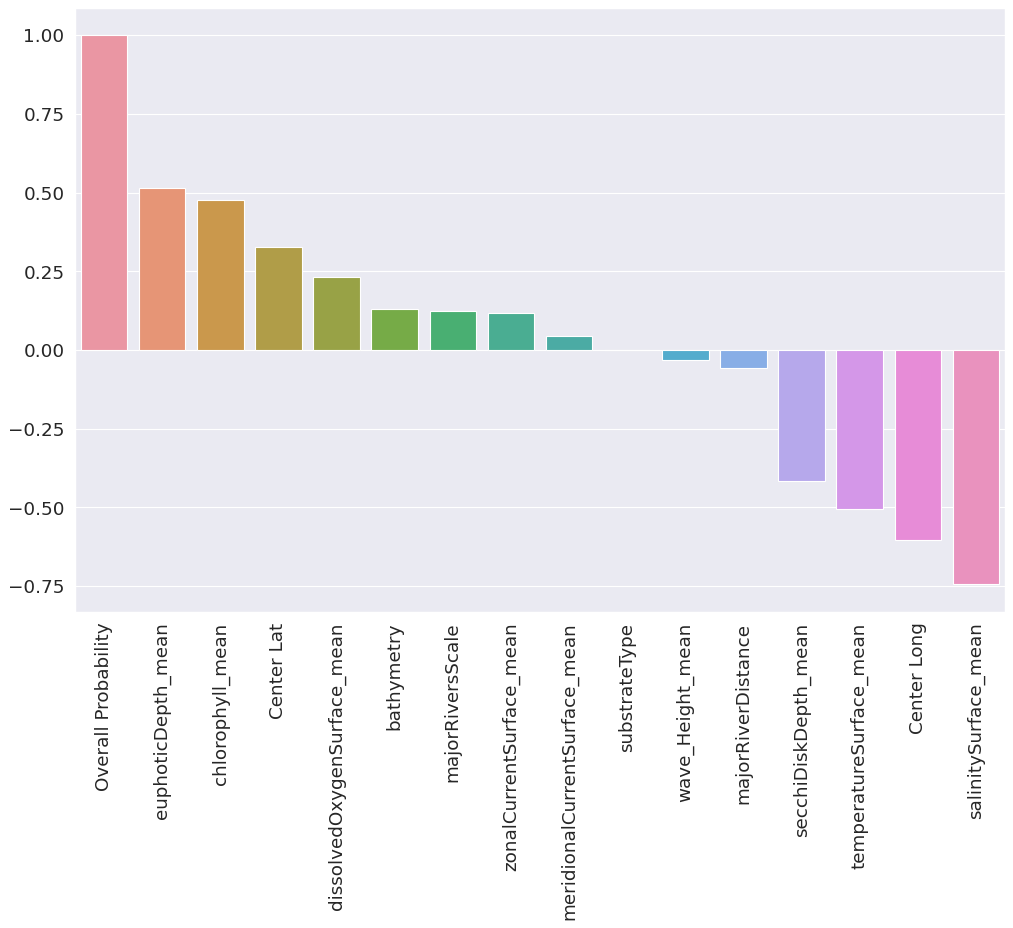

In [48]:
#Correlation with output variable
cor_target2 = corr_mat2['Overall Probability'].sort_values(kind="quicksort", ascending=False)
print(cor_target2)
#Selecting highly correlated features
plt.figure(figsize=(15,10), dpi= 80)
plot2_2 = sns.barplot(x=cor_target2.index,y=cor_target2.values)
plot2_2.set_xticklabels(cor_target2.index.T,rotation=90)
# sns.set(font_scale=1.5)

Now we can use pairplot from seaborn in order to visualize the results. Using parameter kind="reg" we can also see if a straight line can be used to describe each relation.

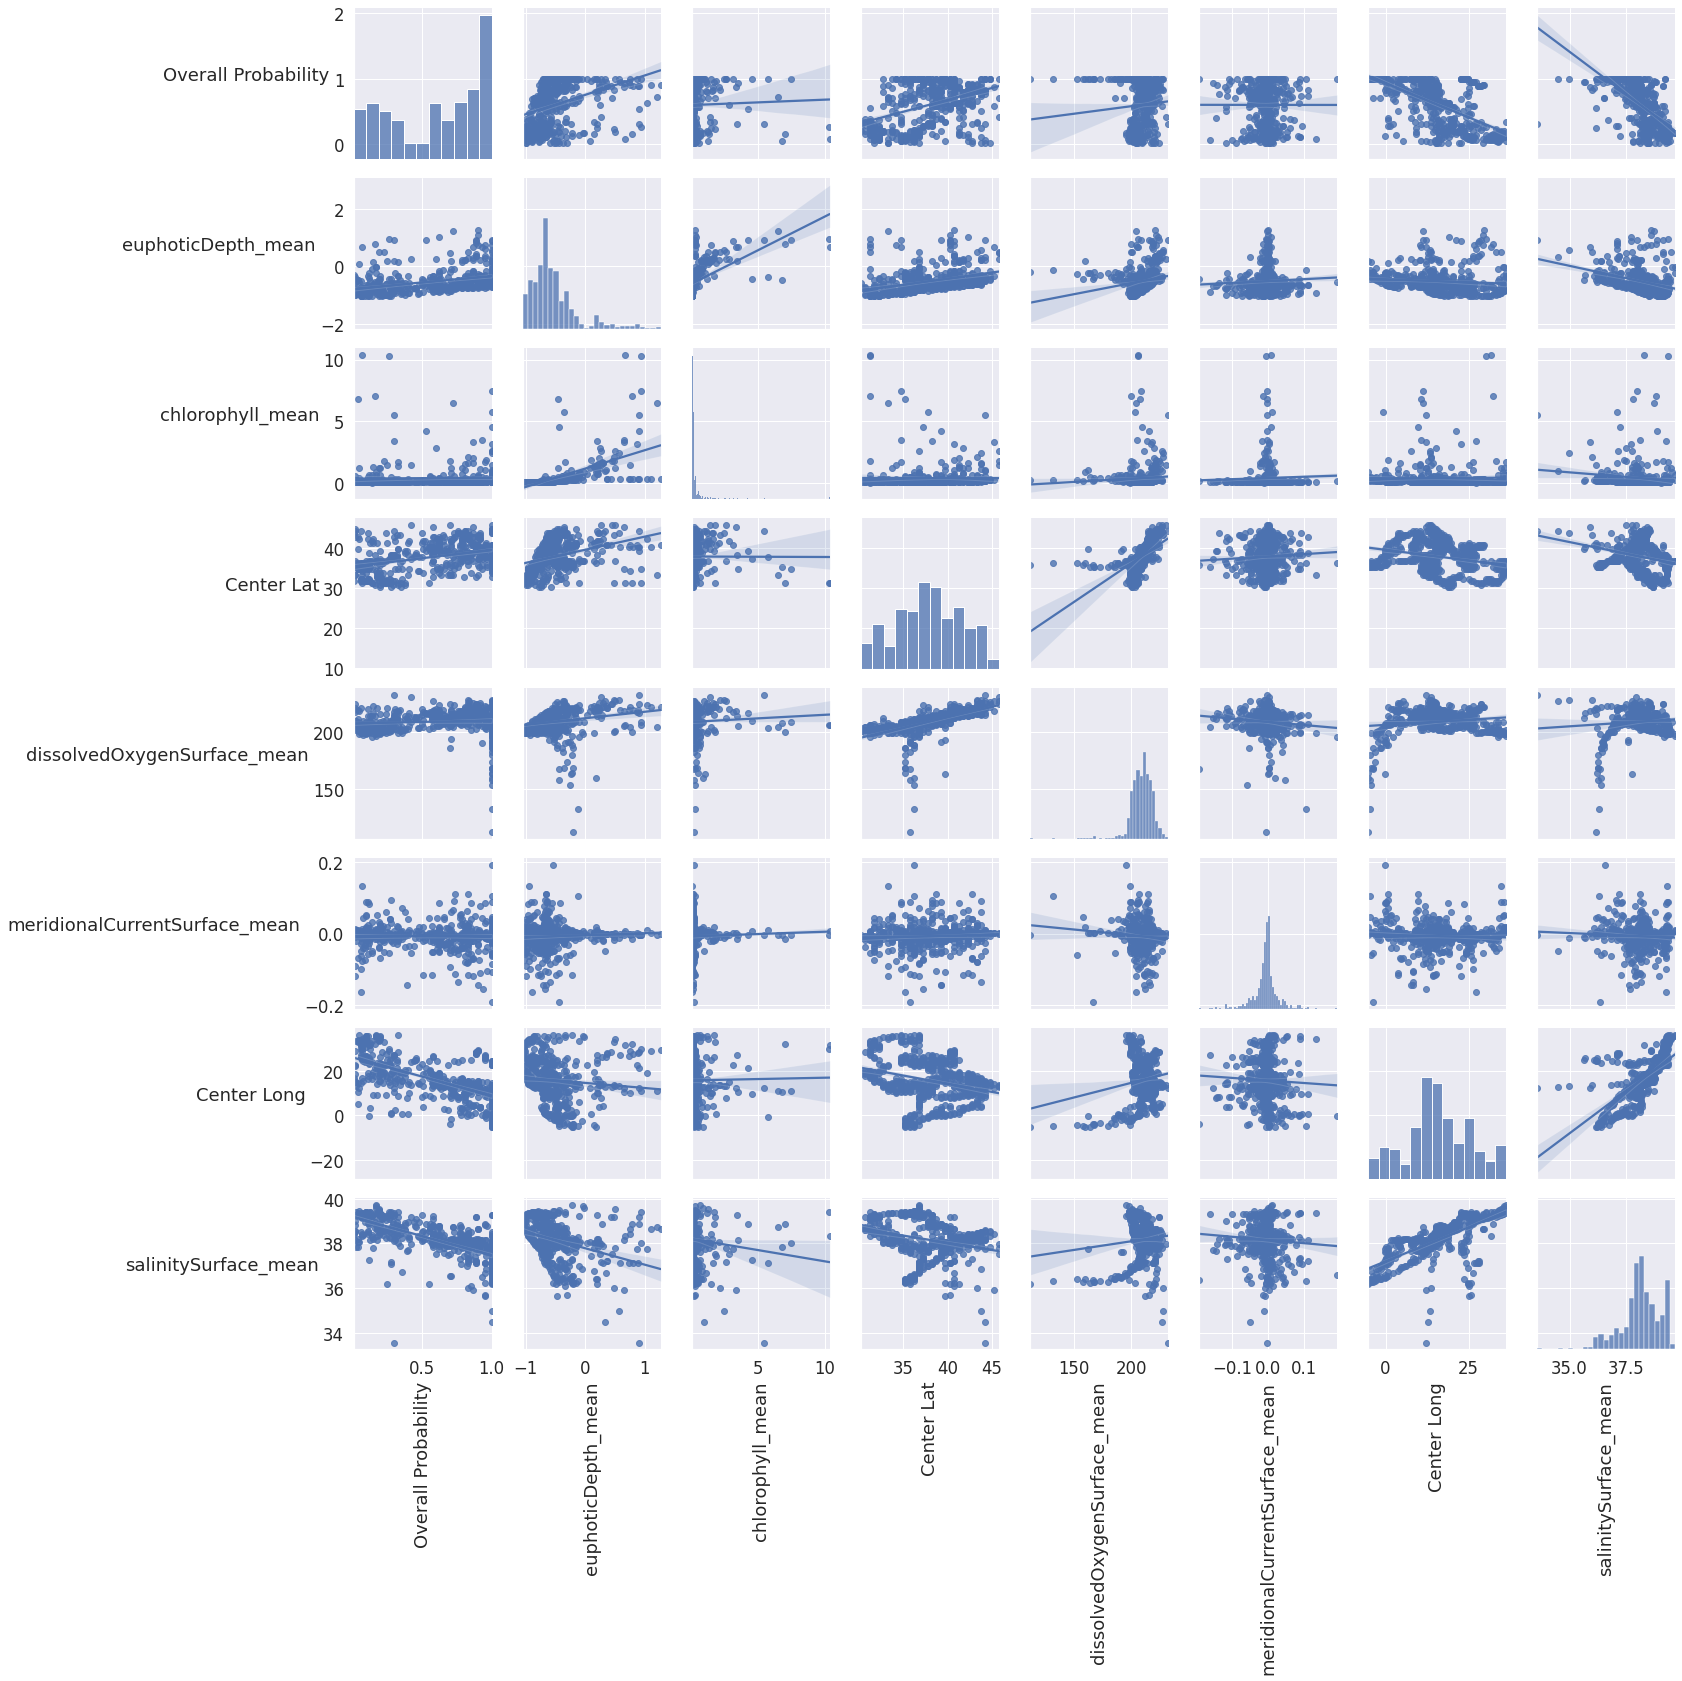

In [38]:
indexes = [0,1,2,3,4,8,14,15]
plot3 = sns.pairplot(basic_attr[cor_target2.index[indexes]], height = 2.5,kind='reg')
for ax in plot3.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.yaxis.get_label().set_horizontalalignment('right')
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)

<font size = "+1">Now its time to find the most correlated features to target among all the features.</font>

In [94]:
correl_attr = train.corr() #TO DO: Find a way to plot spearman correl with heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
k = 20 #number of variables for heatmap
cols = correl_attr.nlargest(k, 'Overall Probability')['Overall Probability'].index
print(correl_attr['Overall Probability'].sort_values(ascending=False).head(k).to_frame())
cm = np.corrcoef(train[cols].values.T)
plot4 = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


<font size = "+1"> In the next plot we observe that most occurencies that have probability of occurance nearly one are at bathemetry near to zero</font>

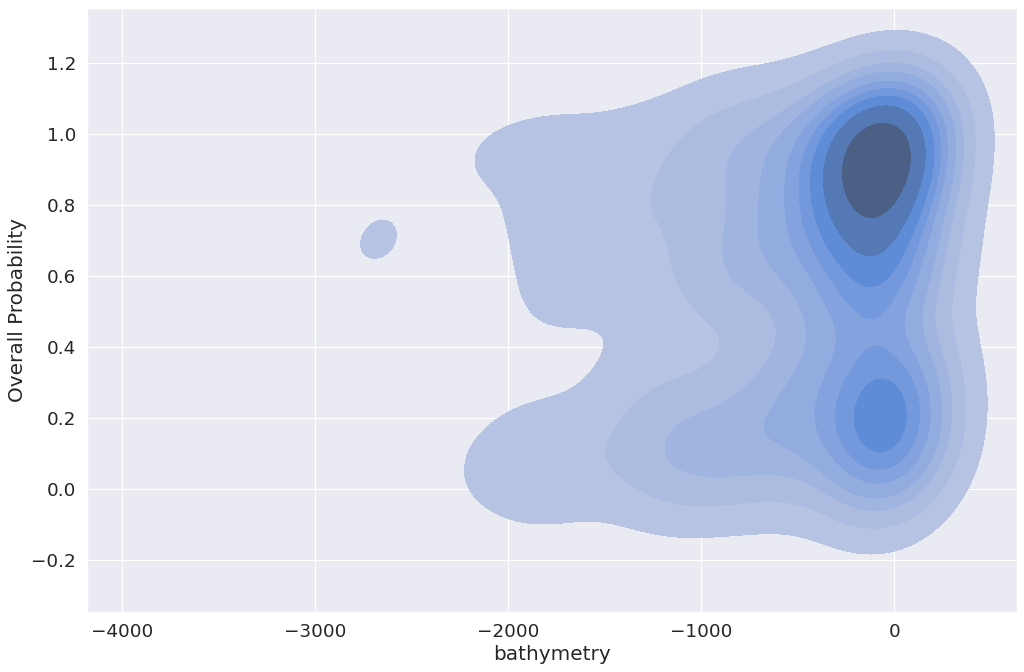

In [77]:
plt.figure(figsize=(15,10), dpi= 80)
plot5 = sns.kdeplot(data=train,x='bathymetry', y="Overall Probability",shade=True)

<font size= "+1"> In the last box plot we can see that in column bathemetry there are many outliers </font>

In [78]:
# train['bathymetry'] = np.where((train['bathymetry'] <train["bathymetry"].quantile(0.05)), train["bathymetry"].mean(),train['bathymetry'] )
# print(train["bathymetry"].quantile(0.05))
print(train["bathymetry"].describe())
train["bathymetry"].median()

count     527.000000
mean     -431.831838
std       600.695809
min     -3549.760000
25%      -617.119995
50%      -132.179001
75%       -31.008400
max         0.000000
Name: bathymetry, dtype: float64


-132.1790009

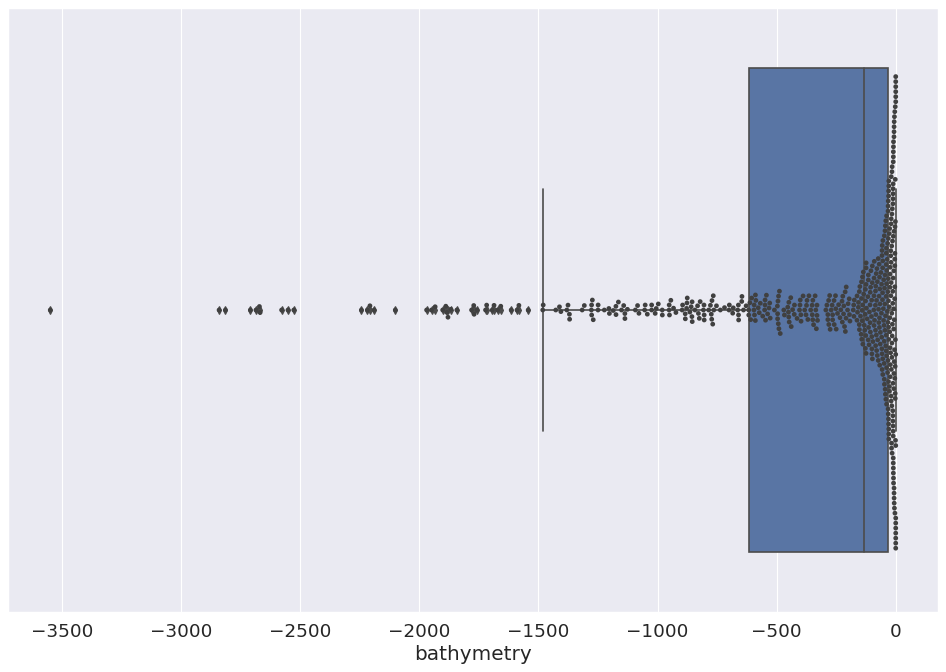

In [79]:
plt.figure(figsize=(15,10), dpi= 80)
plot6 = sns.boxplot(x=train['bathymetry'])
plot6 = sns.swarmplot(x = train['bathymetry'],s = 4.3, color=".25")

<font size ="+1"> There is a weird relation between obs_id with Overall Probabity. obs_id will cause overfitting</font>

                       obs_id  Overall Probability
obs_id               1.000000             0.046099
Overall Probability  0.046099             1.000000
                       obs_id  Overall Probability
obs_id               1.000000             0.032673
Overall Probability  0.032673             1.000000
                       obs_id  Overall Probability
obs_id               1.000000             0.049314
Overall Probability  0.049314             1.000000


<Figure size 1200x800 with 0 Axes>

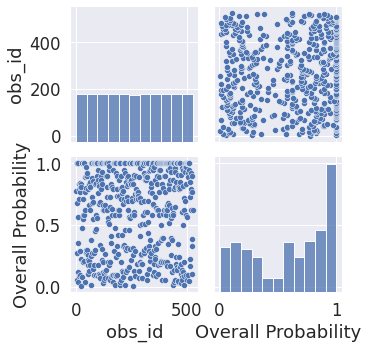

In [81]:
data = train[['obs_id',"Overall Probability"]]
print(data.corr())
print(data.corr("kendall"))
print(data.corr("spearman"))
plt.figure(figsize=(15,10), dpi= 80)
strange_plot = sns.pairplot(data)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_abs_deviation.html#scipy.stats.median_abs_deviation